# The goal is to develop a model that predicts whether individuals are at risk of heart disease.

# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load Data And Checking

In [2]:
train_df = pd.read_csv("/kaggle/input/heart-failure-prediction/heart.csv")
train_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Our dataset contains a total of 918 rows and 12 columns. The 'HeartDisease' column represents the target variable (1 = disease present, 0 = no disease) and indicates whether a person has heart disease. The other columns contain features that help in predicting the disease.

In [3]:
train_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The target variable, HeartDisease, contains values indicating whether individuals have heart disease (1) or not (0). Looking at the table, we see that the mean value of this column is 0.553377, which means that approximately 55% of the individuals in the dataset have heart disease. This indicates that there is a relatively balanced distribution between the classes.

In the Cholesterol column, the mean value is 198.8, with a minimum of 0 and a maximum of 603. A value of 0 is most likely due to missing data or incorrect entries. The high maximum value indicates that some individuals have extremely high cholesterol levels.

In the RestingBP column, the average resting blood pressure is 132, with a minimum of 0 and a maximum of 200. Again, the value of 0 may represent data entry errors or missing values. With a standard deviation of 18.5, blood pressure values show moderate variability.

In the Oldpeak column, the mean is 0.88, with a minimum of -2.6 and a maximum of 6.2. Negative values are likely erroneous data, while the high maximum values indicate that some individuals experience severe ST depression. Examining the distribution of these three columns, we can conclude that feature scaling will be necessary in later stages. This step is crucial for improving model performance and obtaining more consistent results.

The Age column has a mean of 53.5, with a minimum of 28 and a maximum of 77. This shows that the dataset mainly consists of middle-aged and older individuals. Looking at the 25th and 75th percentiles (47 and 60), it is clear that most of the age distribution is concentrated between 40 and 60 years.

In the FastingBS column, the mean is 0.23, with a maximum of 1. This indicates that most individuals in the dataset have normal blood sugar levels, but around 23% have elevated blood sugar.

In the MaxHR column, the mean is 136.8, with a minimum of 60 and a maximum of 202. These values reveal a wide variation in heart rate among individuals.

In [4]:
train_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
train_df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [6]:
duplicate_rows = train_df[train_df.duplicated(keep=False)]
print(duplicate_rows)

Empty DataFrame
Columns: [Age, Sex, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []


There are no missing values in our dataset, which indicates that we are working with a clean dataset for our analysis. This means that additional steps such as data imputation or cleaning are not necessary, allowing us to move directly to data analysis and modeling.

When examining the data types of the variables: Age, HeartDisease, RestingBP, MaxHR, Cholesterol, FastingBS columns are of type integer.Oldpeak column is of type float.Sex, ChestPainType, RestingECG, ExerciseAngina, ST_Slope columns are of type object.

Since there are no duplicate columns in our dataset, we also do not need to perform any row deletion.

# 3. Exploraty Data Analysis

### 3.1 Visualization of numerical columns

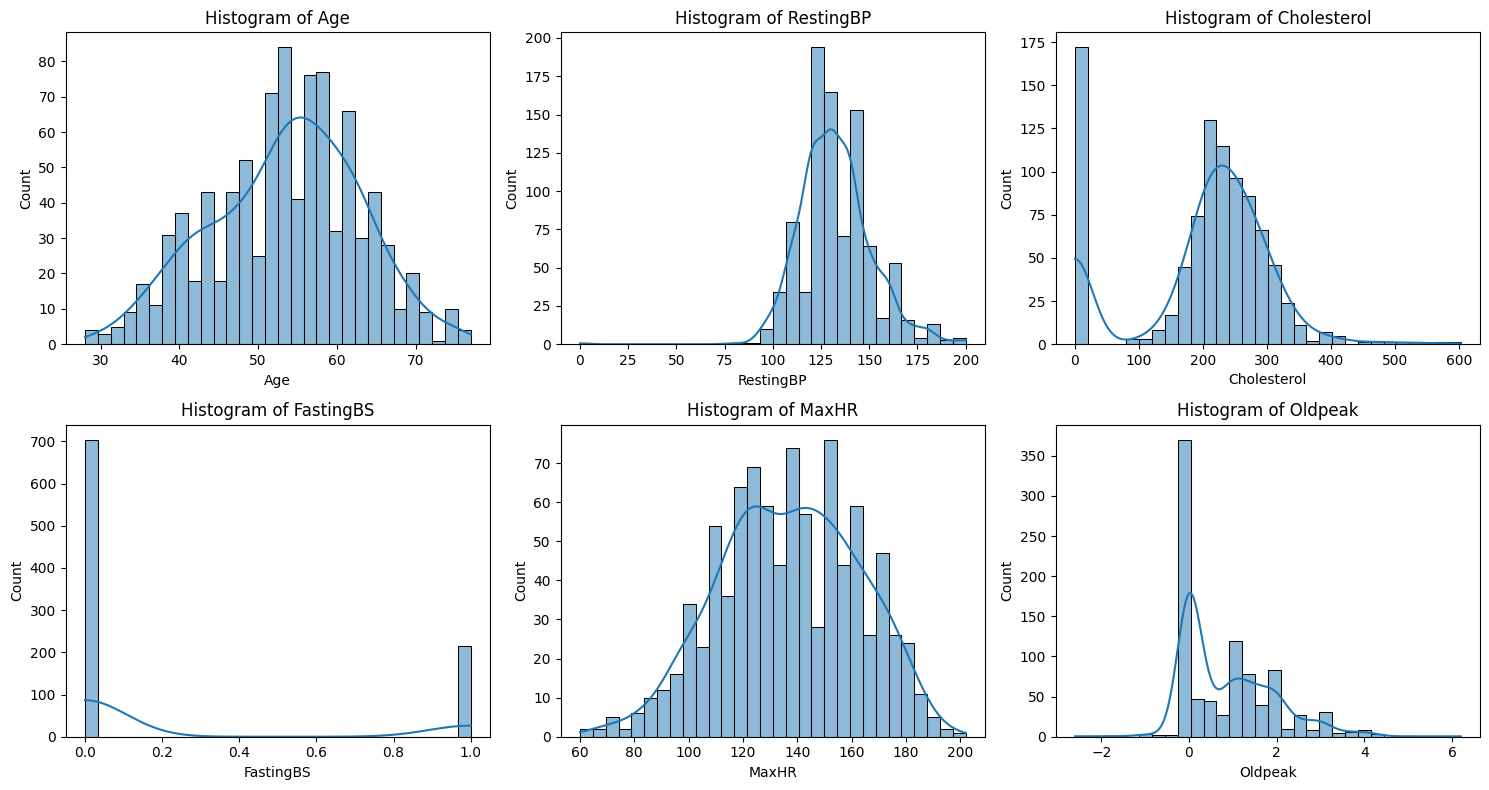

In [7]:
num_cols = train_df.select_dtypes(include=['int64','float64']).columns
features = num_cols[num_cols != 'HeartDisease']

n_features = len(features)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols   

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  

for i, col in enumerate(features):
    sns.histplot(train_df[col], ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Histogram of {col}')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In the Cholesterol and RestingBP columns, zero or extreme values can be observed, which may indicate errors or anomalies in the data.
The presence of negative values in the Oldpeak column is noteworthy and could be a sign of data quality issues.
In such cases, applying log transformation, scaling, or outlier handling may be necessary before the modeling stage.

#### 3.2 Visualization of object columns

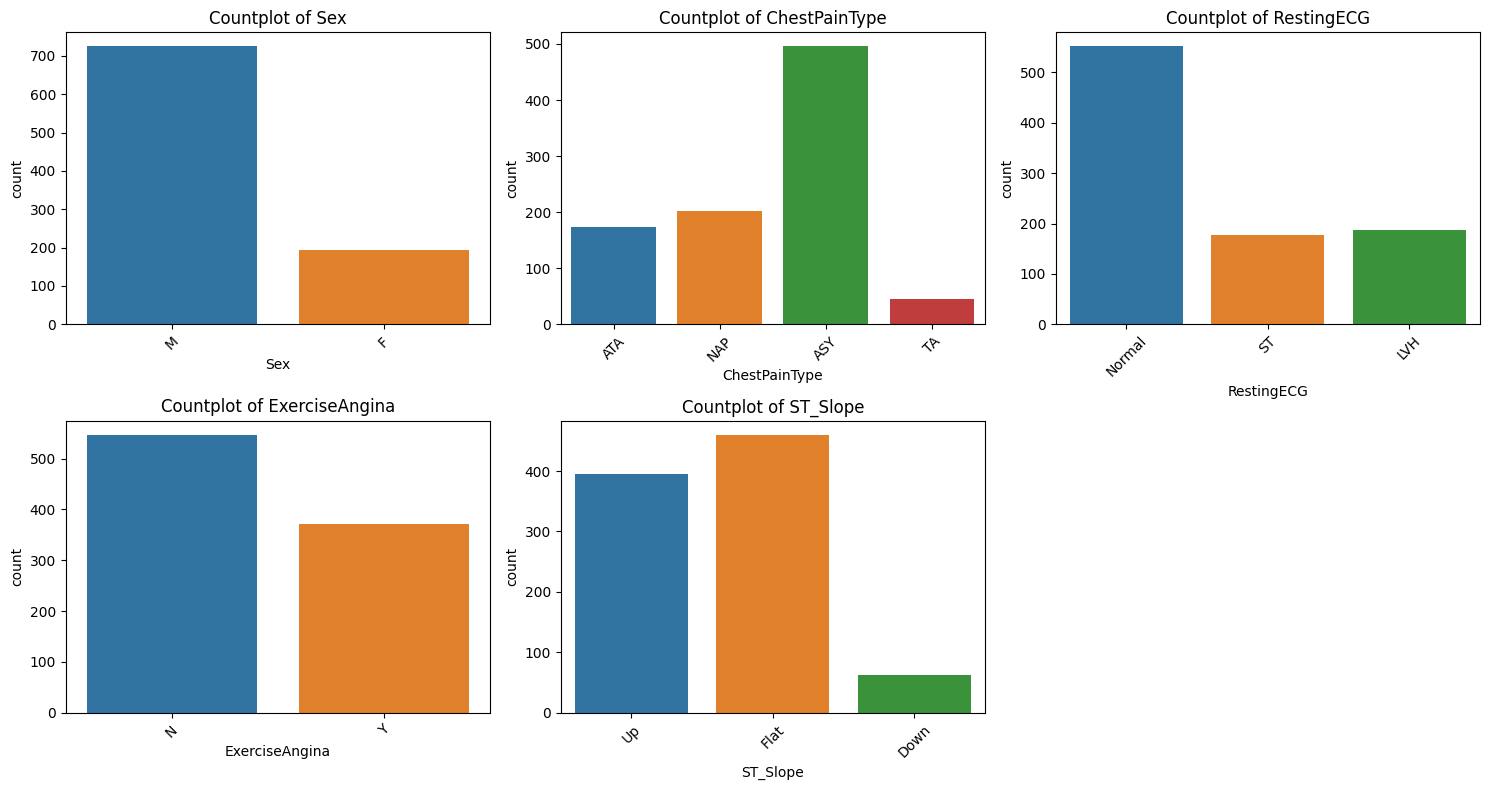

In [8]:
cat_cols = train_df.select_dtypes(include=['object']).columns

n_features = len(cat_cols)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()  

for i, col in enumerate(cat_cols):
    sns.countplot(data=train_df, x=col, ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)  

for j in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

We have explored the object columns, and by examining their distributions in the table, we decide which method to use for numerical conversion. In the data processing stage, since the Sex and Exercise columns consist of two categories, we will use the manual mapping method for them, while for the ST_Slope, RestingECG, and ChestType columns, we will use the one-hot encoding method.

#### 3.3 Visualization of target columns

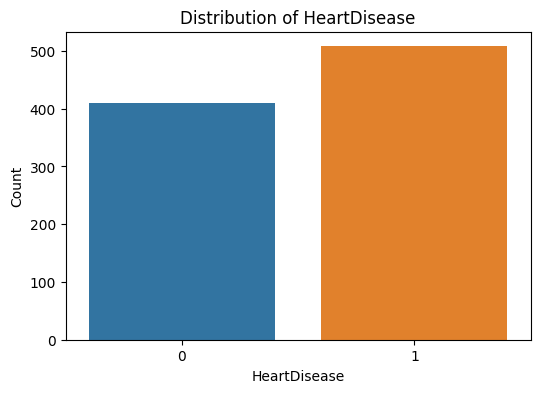

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [9]:
target_col = 'HeartDisease'

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x=target_col)
plt.title(f'Distribution of {target_col}')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.show()

train_df["HeartDisease"].value_counts()

The distribution of the target variable, HeartDisease, is fairly balanced: approximately 55% are 1 (disease present) and 45% are 0 (no disease).
Since this imbalance is not very high, the risk of the model being significantly affected by overfitting or class imbalance is low. This indicates that we have a balanced target variable distribution that can be used directly in the modeling stage.

# 4. Data Preprocessing

#### 4.1 Numerical encoding of object columns

In [10]:
binary_cols = ['Sex', 'ExerciseAngina']
for col in binary_cols:
    train_df[col] = train_df[col].map({'F': 0, 'M': 1, 'N': 0, 'Y': 1})

multi_class_cols = ['ChestPainType', 'RestingECG', 'ST_Slope']
train_df = pd.get_dummies(train_df, columns=multi_class_cols, drop_first=True)

train_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,110,264,0,132,0,1.2,1,False,False,True,True,False,True,False
914,68,1,144,193,1,141,0,3.4,1,False,False,False,True,False,True,False
915,57,1,130,131,0,115,1,1.2,1,False,False,False,True,False,True,False
916,57,0,130,236,0,174,0,0.0,1,True,False,False,False,False,True,False


#### 4.2 log transform

In [11]:
cols = ['Cholesterol', 'RestingBP', 'Oldpeak']

for col in cols:
    safe_col = train_df[col].clip(lower=1)
    train_df[f'{col}_log'] = np.log1p(safe_col)

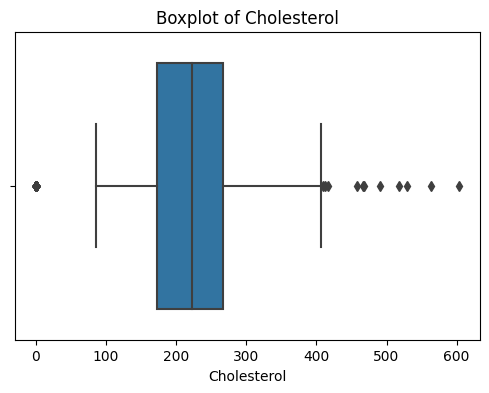

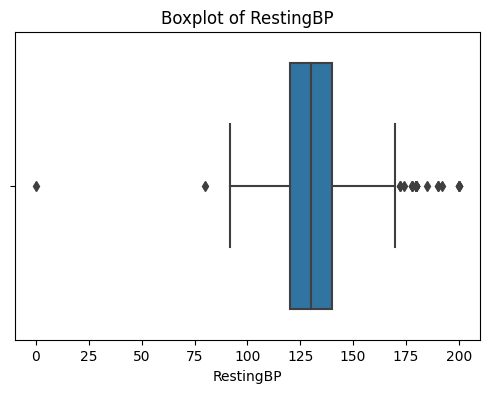

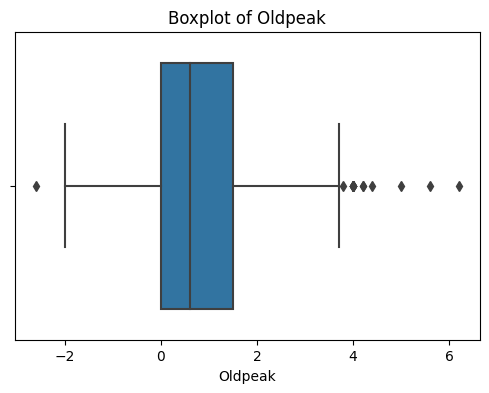

In [12]:
for col in cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

At this stage, we converted our object columns into numerical format using appropriate methods so that the model can interpret them.

Since we identified potential skewness in the Cholesterol, RestingBP, and Oldpeak columns, we applied a log transformation to reduce its effect.

# 5. Model Train

In [13]:
X = train_df.drop('HeartDisease', axis=1)  
y = train_df['HeartDisease']    

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [14]:
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

num_cols = X_train.select_dtypes(include=['int64','float64']).columns
X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

We split our dataset into training and test sets to train the model and evaluate its performance. The training data is used for the model to learn, while the test data is used to assess its performance on previously unseen data. Thanks to the stratify parameter, the class distribution of the target variable is preserved in both the training and test sets, ensuring accurate evaluation even with imbalanced datasets.

Since the numerical features in the training and test sets are on different scales, some features could dominate others during the learning process. Therefore, we applied standardization.

On the training data, fit_transform was used to convert each numerical column so that its mean is 0 and standard deviation is 1.

On the test data, only transform was applied, using the mean and standard deviation learned from the training data to prevent data leakage.

This step is critical, especially for distance- or gradient-based algorithms (Logistic Regression, SVM, KNN, Neural Networks, etc.), to improve model performance and eliminate scale differences between features.

# 6. Model Building

In [15]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.875
[[68 14]
 [ 9 93]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86        82
           1       0.87      0.91      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



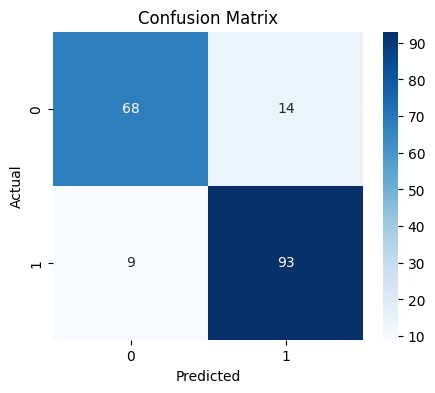

In [16]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)

y_pred = gb.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.875
[[71 11]
 [12 90]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86        82
           1       0.89      0.88      0.89       102

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



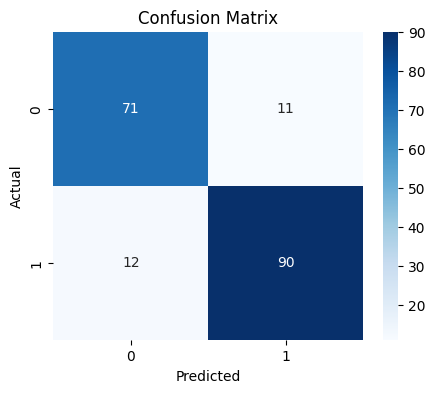

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8913043478260869
[[70 12]
 [ 8 94]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        82
           1       0.89      0.92      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



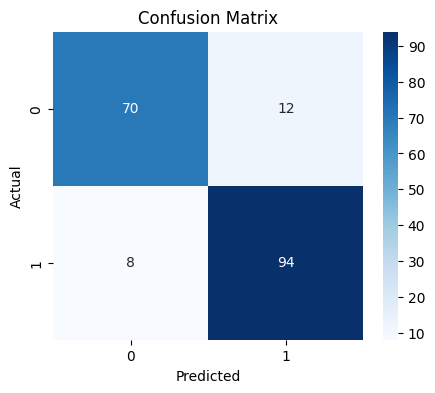

In [20]:
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [21]:
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

ensemble = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('lr', lr)],
    voting='hard' 
)

ensemble.fit(X_train_scaled, y_train)

y_pred_ensemble = ensemble.predict(X_test_scaled)

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred_ensemble))
print(classification_report(y_test, y_pred_ensemble))

Ensemble Accuracy: 0.8967391304347826
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        82
           1       0.91      0.90      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



I experimented with different models and observed their accuracy on the test set. Then, I evaluated the prediction performance of the models using cross-validation. Finally, I enhanced the model performance using an ensemble method to achieve better predictions.

# 7. Result

As a result of my analyses, I found that the best-performing model was logistic regression. However, I also observed that it was not sufficiently effective in predicting the risk of heart disease. Therefore, I created my own model using an ensemble method to improve the prediction rate and tried to achieve better results. Although my new model demonstrated better overall performance, it still struggles with accurately predicting heart disease risk. In future studies, I can improve the model further to achieve more accurate predictions.